In [6]:
import pandas as pd

# Load the cleaned dataset 'PM10_final.xlsx'
file_path = '...PM10_final.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
data.head()


,LAEI 1km2 ID,GRID_ExactCut_ID,PM10,Easting_y,Northing_y,SO2,NMVOC,NH3,CO,CH4,N2O,Cd,Hg,Pb,BaP,PCB,HCl,PM10_lag1,PM10_lag2
0,5910,1,0.130963,510500,203500,0.617954,0.151999,0.926393,1.598706,0.712821,0.564073,0.000011,0.000003,0.000052,1.299061e-06,1.373872e-06,0.0,0.130963,0.130963
1,5911,2,5.010572,511500,203500,0.619518,0.126560,1.185892,1.574760,0.261035,0.839242,0.000012,0.000003,0.000045,4.766745e-07,3.934605e-07,0.0,0.130963,0.130963
2,5912,3,2.889030,512500,203500,0.624707,0.205273,1.165951,1.540182,0.543780,0.785585,0.000012,0.000003,0.000049,7.196872e-07,9.018982e-07,0.0,5.010572,0.130963
3,5915,4,0.148034,515500,203500,0.604540,0.236015,0.797708,1.936277,1.384252,0.424445,0.000012,0.000002,0.000043,3.763843e-07,2.899396e-04,0.0,2.889030,5.010572
4,5916,5,0.134681,516500,203500,0.603073,0.215074,0.893011,1.741540,1.349165,0.449739,0.000012,0.000002,0.000042,2.543477e-07,1.003148e-04,0.0,0.148034,2.889030


In [12]:
import pandas as pd

# Estimate the number of observations in the dataset
num_observations = data.shape[0]
print("Number of observations:", num_observations)


Number of observations: 3355


Simple Regression

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Preprocess the data 

# Split the data into features (X) and target (y), and further into training and testing sets
X = data.drop('PM10', axis=1)  # 'PM10' is the target column
y = data['PM10']  # 'PM10' is the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Simple Linear Regression'],
    'RMSE': [rmse]
})

# Print the results table
print(results_df)



                      Model      RMSE
0  Simple Linear Regression  1.402014


In [10]:
import pandas as pd


# Check for missing values in each column
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


LAEI 1km2 ID        0
GRID_ExactCut_ID    0
PM10                0
Easting_y           0
Northing_y          0
SO2                 0
NMVOC               0
NH3                 0
CO                  0
CH4                 0
N2O                 0
Cd                  0
Hg                  0
Pb                  0
BaP                 0
PCB                 0
HCl                 0
PM10_lag1           0
PM10_lag2           0
dtype: int64


Ridge/Lasso Regression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Split the data into features (X) and target (y), and further into training and testing sets
X = data.drop('PM10', axis=1)  # 'PM10' is the target column
y = data['PM10']  # 'PM10' is the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
ridge_model = Ridge(alpha=1.0, random_state=42)
lasso_model = Lasso(alpha=0.1, random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Ridge Regression', 'Lasso Regression'],
    'RMSE': [lr_rmse, rf_rmse, gb_rmse, ridge_rmse, lasso_rmse]
})

# Print the results table
print(results_df)


                         Model      RMSE
0     Simple Linear Regression  1.402014
1      Random Forest Regressor  1.192053
2  Gradient Boosting Regressor  1.213323
3             Ridge Regression  1.524223
4             Lasso Regression  1.522668


The RMSE is a measure of how well the model is able to predict the target variable, with lower values indicating better performance.

Simple Linear Regression: 1.402 is relatively good compared to some of the more complex models.
Random Forest Regressor performed the best among all with an RMSE of approximately 1.192. It seems to handle the complexity of the dataset well.
Gradient Boosting Regressor also performed well with an RMSE of approximately 1.213, which is close to that of the Random Forest Regressor.
Ridge Regression: 1.524, which is higher compared to the other models, indicating it might not be the best fit for this dataset.
Lasso Regression has a similar RMSE to Ridge Regression, approximately 1.523, indicating similar performance.

Based on these results, the Random Forest Regressor and Gradient Boosting Regressor are the top-performing models for this dataset. 

XGBoost Regressor

In [17]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target (y), and further into training and testing sets
X = data.drop('PM10', axis=1)  # 'PM10' is the target column
y = data['PM10']  # 'PM10' is the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate RMSE
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Check if results_df is defined, if not, define it
try:
    results_df
except NameError:
    results_df = pd.DataFrame(columns=['Model', 'RMSE'])

# Append the results to the results DataFrame
results_df = results_df.append({
    'Model': 'XGBoost Regressor',
    'RMSE': xgb_rmse
}, ignore_index=True)

# Print the results table
print(results_df)


               Model      RMSE
0  XGBoost Regressor  1.236798


/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/935834499.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
Neural Network Regressor

In [7]:
from sklearn.neural_network import MLPRegressor

# Initialise the Neural Network Regressor model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test)

# Calculate RMSE
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))

# Append the results to the results DataFrame
results_df = results_df.append({
    'Model': 'Neural Network Regressor',
    'RMSE': nn_rmse
}, ignore_index=True)
# Print the results table
print(results_df)

                      Model       RMSE
0         XGBoost Regressor   1.236798
1  Neural Network Regressor  12.203321


/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2276072290.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


The approach below/fin-tuning should help in addressing the high RMSE of the NN model by tuning its architecture, hyperparameters, scaling the features, and ensuring convergence.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
}

# Initialise the Neural Network Regressor model
nn_model = MLPRegressor(max_iter=2000, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(nn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_nn_model = grid_search.best_estimator_

# Make predictions using the best model
nn_predictions = best_nn_model.predict(X_test_scaled)

# Calculate RMSE
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))

# Append the results to the results DataFrame
results_df = results_df.append({
    'Model': 'Neural Network Regressor',
    'RMSE': nn_rmse
}, ignore_index=True)

# Check if the Neural Network Regressor is already in the results DataFrame
mask = results_df['Model'] == 'Neural Network Regressor'

# If it is, overwrite the results, else append a new row
if mask.any():
    results_df.loc[mask, 'RMSE'] = nn_rmse
else:
    results_df = results_df.append({
        'Model': 'Neural Network Regressor',
        'RMSE': nn_rmse
    }, ignore_index=True)

    # Print the results table
print(results_df)


                      Model      RMSE
0         XGBoost Regressor  1.236798
1  Neural Network Regressor  1.581120
2  Neural Network Regressor  1.581120
3  Neural Network Regressor  1.581120


/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/4219133257.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


To understand better if our models performed well, we next conduct Dependent Varaible Analysis

In [10]:
print(y.describe())


count    3355.000000
mean        1.761000
std         1.908657
min         0.000008
25%         0.298265
50%         1.175279
75%         2.498567
max        17.280088
Name: PM10, dtype: float64


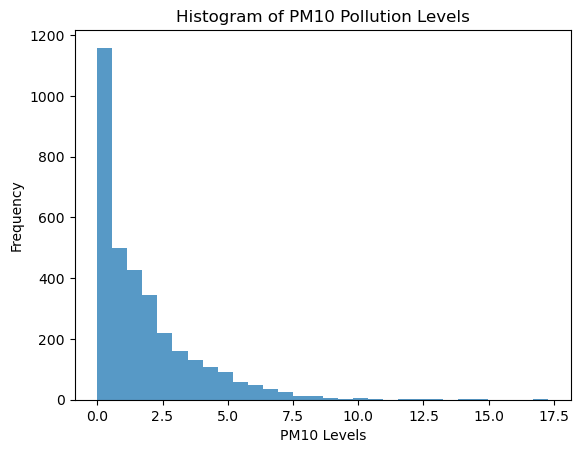

In [11]:
import matplotlib.pyplot as plt
plt.hist(y, bins=30, alpha=0.75)
plt.xlabel('PM10 Levels')
plt.ylabel('Frequency')
plt.title('Histogram of PM10 Pollution Levels')
plt.show()


In [12]:
# Create bins for the histogram
bins = np.linspace(min(y), max(y), 30) # Adjust the number 30 to change the number of bins

# Use the `cut` function to segment and sort the data values into bins
categories = pd.cut(y, bins)

# Create a Frequency Table
frequency_table = pd.value_counts(categories, sort=False)

print(frequency_table)


(8.06e-06, 0.596]    1178
(0.596, 1.192]        510
(1.192, 1.788]        436
(1.788, 2.383]        339
(2.383, 2.979]        216
(2.979, 3.575]        174
(3.575, 4.171]        107
(4.171, 4.767]        116
(4.767, 5.363]         88
(5.363, 5.959]         52
(5.959, 6.555]         46
(6.555, 7.15]          30
(7.15, 7.746]          19
(7.746, 8.342]         14
(8.342, 8.938]          7
(8.938, 9.534]          6
(9.534, 10.13]          5
(10.13, 10.726]         4
(10.726, 11.321]        0
(11.321, 11.917]        1
(11.917, 12.513]        0
(12.513, 13.109]        3
(13.109, 13.705]        0
(13.705, 14.301]        1
(14.301, 14.897]        1
(14.897, 15.492]        0
(15.492, 16.088]        0
(16.088, 16.684]        0
(16.684, 17.28]         1
Name: PM10, dtype: int64


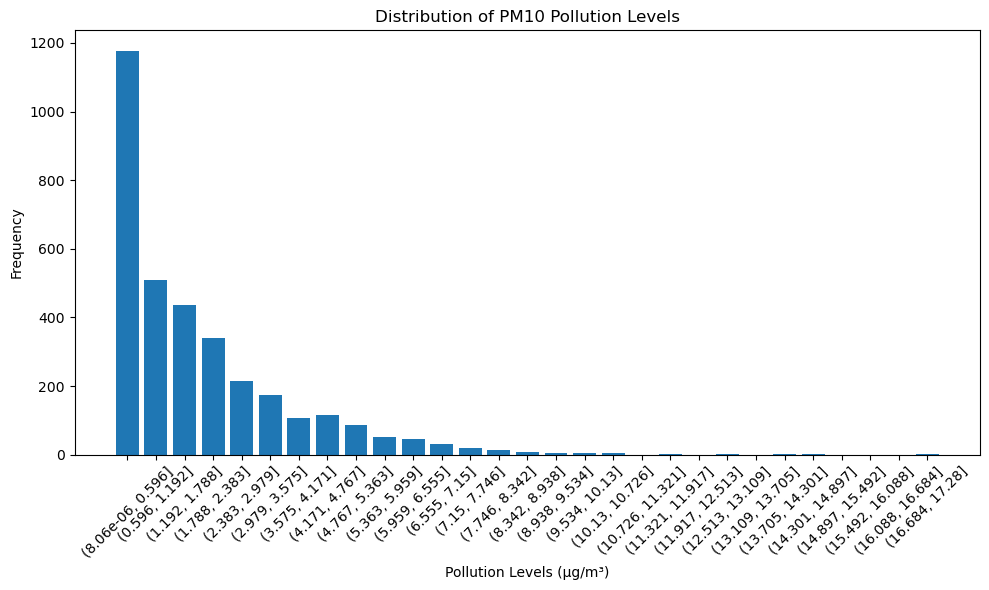

In [15]:
import matplotlib.pyplot as plt

# Define the bins and frequencies
bins = ["(8.06e-06, 0.596]", "(0.596, 1.192]", "(1.192, 1.788]", "(1.788, 2.383]", "(2.383, 2.979]", 
        "(2.979, 3.575]", "(3.575, 4.171]", "(4.171, 4.767]", "(4.767, 5.363]", "(5.363, 5.959]",
        "(5.959, 6.555]", "(6.555, 7.15]", "(7.15, 7.746]", "(7.746, 8.342]", "(8.342, 8.938]",
        "(8.938, 9.534]", "(9.534, 10.13]", "(10.13, 10.726]", "(10.726, 11.321]", "(11.321, 11.917]",
        "(11.917, 12.513]", "(12.513, 13.109]", "(13.109, 13.705]", "(13.705, 14.301]", "(14.301, 14.897]",
        "(14.897, 15.492]", "(15.492, 16.088]", "(16.088, 16.684]", "(16.684, 17.28]"]
frequencies = [1178, 510, 436, 339, 216, 174, 107, 116, 88, 52, 46, 30, 19, 14, 7, 6, 5, 4, 0, 1, 0, 3, 0, 1, 1, 0, 0, 0, 1]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(bins, frequencies)
plt.xlabel('Pollution Levels (µg/m³)')
plt.ylabel('Frequency')
plt.title('Distribution of PM10 Pollution Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


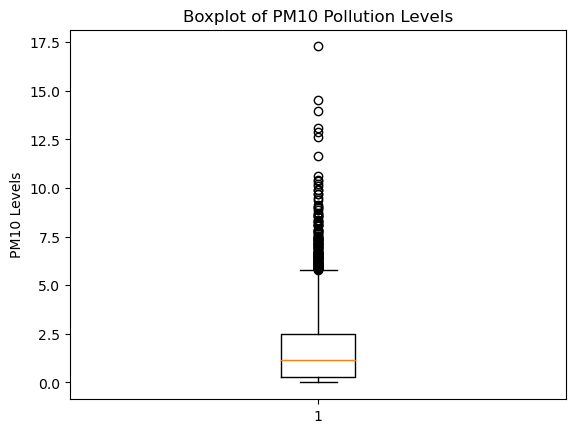

In [19]:
plt.boxplot(y)
plt.ylabel('PM10 Levels')
plt.title('Boxplot of PM10 Pollution Levels')
plt.show()


We seem to have lots of outliers and, therefore, need to do some transformation of the PM10 

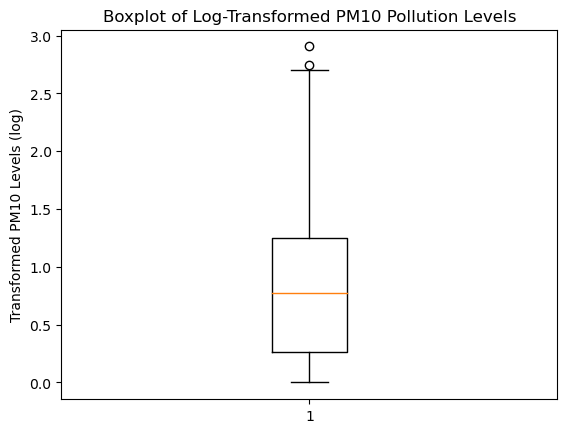

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y contains the PM10 levels
y_log = np.log1p(y)

# Plotting the boxplot of the transformed data
plt.boxplot(y_log)
plt.ylabel('Transformed PM10 Levels (log)')
plt.title('Boxplot of Log-Transformed PM10 Pollution Levels')
plt.show()


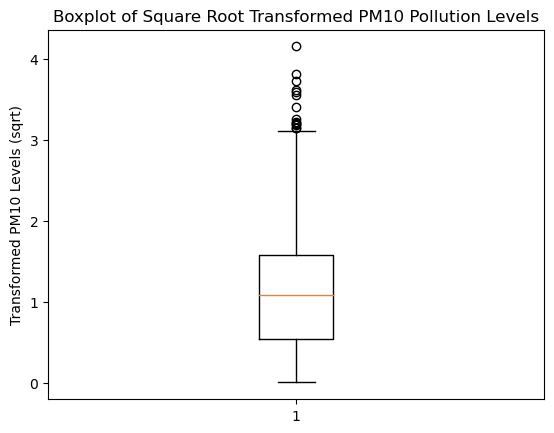

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y contains the PM10 levels
y_sqrt = np.sqrt(y)

# Plotting the boxplot of the transformed data
plt.boxplot(y_sqrt)
plt.ylabel('Transformed PM10 Levels (sqrt)')
plt.title('Boxplot of Square Root Transformed PM10 Pollution Levels')
plt.show()




The Box-Cox transformation is a parametrised transformation that aims to transform the data into a normal shape

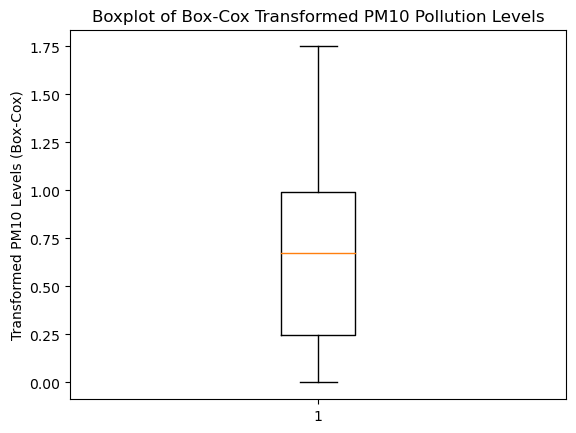

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Assuming y contains the PM10 levels
# Adding 1 to all elements of y to ensure all values are positive
y_boxcox, _ = boxcox(y + 1)

# Plotting the boxplot of the transformed data
plt.boxplot(y_boxcox)
plt.ylabel('Transformed PM10 Levels (Box-Cox)')
plt.title('Boxplot of Box-Cox Transformed PM10 Pollution Levels')
plt.show()


In [26]:
import pandas as pd

# Assuming y contains the original PM10 levels
# y_boxcox contains the Box-Cox transformed PM10 levels

# Creating a DataFrame
df = pd.DataFrame({
    'Original PM10 Levels': y,
    'Box-Cox Transformed PM10 Levels': y_boxcox
})

# Displaying descriptive statistics for original and transformed data
print(df.describe())



       Original PM10 Levels  Box-Cox Transformed PM10 Levels
count           3355.000000                      3355.000000
mean               1.761000                         0.654326
std                1.908657                         0.430783
min                0.000008                         0.000008
25%                0.298265                         0.248360
50%                1.175279                         0.671816
75%                2.498567                         0.993971
max               17.280088                         1.750080


In [29]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(y_boxcox)

# Determine the outliers
outliers = y_boxcox[np.abs(z_scores) > 3]

print("Number of Outliers:", len(outliers))
print("Outliers:", outliers)


Number of Outliers: 0
Outliers: []


In [31]:
import numpy as np

# Calculate Q1, Q2, and IQR
q1 = np.percentile(y_boxcox, 25)
q3 = np.percentile(y_boxcox, 75)
iqr = q3 - q1

# Determine the outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = y_boxcox[(y_boxcox < lower_bound) | (y_boxcox> upper_bound)]

print("Number of Outliers:", len(outliers))
print("Outliers:", outliers)


Number of Outliers: 0
Outliers: []


Updating the dataset

In [38]:
import pandas as pd
from scipy.stats import boxcox

# Add the transformed column to the DataFrame
df['PM10_cox'] = boxcox(df['PM10'] + 1)[0]  # Adjust as necessary based on your actual column name and transformation

# Drop the original PM10 column
df.drop('PM10', axis=1, inplace=True)

# Save the updated DataFrame back to Excel
df.to_excel('.../PM10_final_updated.xlsx', index=False)

In [39]:
# Print the columns of the updated DataFrame
print(df.columns)


Index(['LAEI 1km2 ID', 'GRID_ExactCut_ID', 'Easting_y', 'Northing_y', 'SO2',
       'NMVOC', 'NH3', 'CO', 'CH4', 'N2O', 'Cd', 'Hg', 'Pb', 'BaP', 'PCB',
       'HCl', 'PM10_lag1', 'PM10_lag2', 'PM10_cox'],
      dtype='object')


In [41]:
import pandas as pd


# Drop the 'PM10_lag1' and 'PM10_lag2' columns
df.drop(['PM10_lag1', 'PM10_lag2'], axis=1, inplace=True)

# Create lagged versions of 'PM10_cox'
df['PM10_cox_lag1'] = df['PM10_cox'].shift(1)  # Lag by 1 period
df['PM10_cox_lag2'] = df['PM10_cox'].shift(2)  # Lag by 2 periods

# Fill any NaN values generated due to shifting
df.fillna(method='bfill', inplace=True)

# Save the updated DataFrame back to Excel
updated_file_path = '/Users/natashasmith/Desktop/PM10_final_updated.xlsx'
df.to_excel(updated_file_path, index=False)

# Check the columns of the updated DataFrame
print(df.columns)


Index(['LAEI 1km2 ID', 'GRID_ExactCut_ID', 'Easting_y', 'Northing_y', 'SO2',
       'NMVOC', 'NH3', 'CO', 'CH4', 'N2O', 'Cd', 'Hg', 'Pb', 'BaP', 'PCB',
       'HCl', 'PM10_cox', 'PM10_cox_lag1', 'PM10_cox_lag2'],
      dtype='object')


In [42]:
# Check for missing values in the DataFrame
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)


LAEI 1km2 ID        0
GRID_ExactCut_ID    0
Easting_y           0
Northing_y          0
SO2                 0
NMVOC               0
NH3                 0
CO                  0
CH4                 0
N2O                 0
Cd                  0
Hg                  0
Pb                  0
BaP                 0
PCB                 0
HCl                 0
PM10_cox            0
PM10_cox_lag1       0
PM10_cox_lag2       0
dtype: int64


In [ ]:
# # Forward fill
# df.fillna(method='ffill', inplace=True)
# df.to_excel('/Users/natashasmith/Desktop/PM10_final_updated.xlsx', index=False)


Putting everything together

In [44]:
import pandas as pd
import numpy as np
import xgboost as xgb
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load and preprocess the dataset
file_path = '...PM10_final_updated.xlsx'
data = pd.read_excel(file_path)


# We have transformed PM10 values saved in 'PM10_cox'
y = data['PM10_cox']
X = data.drop('PM10_cox', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
}

# Train the models, make predictions, calculate RMSE, and store results
results_df = pd.DataFrame(columns=['Model', 'RMSE'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)

# Print the results table
print(results_df)


/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2510152534.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)
/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2510152534.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)
/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2510152534.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)
/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2510152534.py:40: Fu

               Model      RMSE
0  Linear Regression  0.329979
1      Random Forest  0.245891
2  Gradient Boosting  0.247571
3              Ridge  0.379520
4              Lasso  0.382328
5            XGBoost  0.258924


/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2510152534.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)


Additng NNs Regressor

We next perform further model tuning and cross-validation to optimise the model parameters and assess their performance more robustly. Finally, we compare our results. 


In [47]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Initialise the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
}

# Initialise results DataFrame
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

# Perform cross-validation and store results
for model_name, model in models.items():
    # Calculate cross-validated RMSE
    neg_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    # Calculate cross-validated MAE
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    avg_mae = np.mean(mae_scores)

    # Append results to the DataFrame
    results_df = results_df.append({'Model': model_name, 'RMSE': avg_rmse, 'MAE': avg_mae}, ignore_index=True)

# Hyperparameter grid for NN
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
}

# Initialise the NN Regressor model
nn_model = MLPRegressor(max_iter=2000, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Grid Search for NN
grid_search = GridSearchCV(nn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)
best_nn_model = grid_search.best_estimator_

# Compute RMSE and MAE for NN model and add it to the results DataFrame
nn_rmse = np.sqrt(-grid_search.best_score_)
nn_mae_scores = -cross_val_score(best_nn_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
nn_avg_mae = np.mean(nn_mae_scores)

# Append the NN results to the results DataFrame
results_df = results_df.append({
    'Model': 'Neural Network Regressor',
    'RMSE': nn_rmse,
    'MAE': nn_avg_mae
}, ignore_index=True)

# Print the updated results table
print(results_df)


/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2641158071.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': avg_rmse, 'MAE': avg_mae}, ignore_index=True)
/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2641158071.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': avg_rmse, 'MAE': avg_mae}, ignore_index=True)
/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2641158071.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': avg_rmse, 'MAE': avg_mae}, ignore_index=True)
/var/folders/33/h5vv9bpj5

                      Model      RMSE       MAE
0         Linear Regression  1.067225  0.305496
1             Random Forest  0.255806  0.193998
2         Gradient Boosting  0.263997  0.198448
3                     Ridge  0.394622  0.326558
4                     Lasso  0.392976  0.333159
5                   XGBoost  0.264377  0.198081
6  Neural Network Regressor  0.330178  0.241556


/var/folders/33/h5vv9bpj5pn1qwm0r096syj40000gn/T/ipykernel_63703/2641158071.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
